In [78]:
import csv
import pandas as pd
import os

Check if arguement is a file or folder
If file (CSV):
    Extract 
        - Extract peak heights, peak ratio, integration, integration ratio
If folder:
    Iterate through folder
        - Get time from all SPC files
        - Extract peak heights, peak ratio, integration, integration ratio
Save data to O/P ratio CSV

9


In [69]:
# Classes for organizing H state info
class Ortho:
    range = [580, 595]
    peak = 0
    integral = 0

class Para:
    range = [347, 365]
    peak = 0
    integral = 0

# Location of CSV spectrum file
file_path = '20220412 H2 test LN2 DUT2 0.5in8cm/20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv'


def ratio_finder(file_path):
    # Create data frame
    df = pd.read_csv(file_path)
    
    # Iterate through rows
    for index, row in df.iterrows():
        wl = row[0]
        count = row[1]

        # Find peak ranges, integrate them, and save maximum peak height
        if wl < Ortho.range[1] and wl > Ortho.range[0]:
            Ortho.peak = max(Ortho.peak, count)
            Ortho.integral += count
        if wl < Para.range[1] and wl > Para.range[0]:
            Para.peak = max(Para.peak, count)
            Para.integral += count

    # Output dictionary 
    output = {}
    output['Filename'] = file_path.split('/')[-1]

    # Data relating to peak height
    peak_sum = [Para.peak + Ortho.peak]
    output['Para peak'] = [Para.peak]
    output['Ortho peak'] = [Ortho.peak]
    output['Para peak percent'] = [Para.peak / peak_sum * 100]
    output['Ortho peak percent'] = [Ortho.peak / peak_sum * 100]
    output['O/P peak ratio'] = [Ortho.peak / Para.peak]

    # Data relating to integration
    integral_sum = [Para.integral + Ortho.integral]
    output['Para integral'] = [Para.integral]
    output['Ortho integral'] = [Ortho.integral]
    output['Para integral percent'] = [Para.integral / integral_sum * 100]
    output['Ortho integral percent'] = [Ortho.integral / integral_sum * 100]

    return output

result = ratio_finder(file_path)

df = pd.DataFrame.from_dict(result)
df.to_csv('O_P_Ratios.csv', mode='a', header=False)
print(df)

                                      Filename    Para peak    Ortho peak  \
0  20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv  6884.656541  13577.626364   

     Para peak percent   Ortho peak percent  O/P peak ratio  Para integral  \
0  [33.64559356824121]  [66.35440643175879]        1.972157   33001.029569   

   Ortho integral Para integral percent Ortho integral percent  
0    60521.261552     [35.286806143685]      [64.713193856315]  


In [77]:
# add time stamps from the SPC files 

df = pd.read_csv('O_P_Ratios.csv')
test = '20220412 H2 test LN2 DUT2 0.5in8cm/20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv'
filename = test.split('/')[-1]
names = df['Filename']
print(filename)
print(names)

for row in names:
    if row == filename:
        print('found')



20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv
0    20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv
1    20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv
Name: Filename, dtype: object
found
found


In [92]:
'''
Scripts for formatting file names
'''

import os

path = 'C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220407 H2 test 30K'

for filename in os.listdir(path):
    n = filename.split('-')
    os.rename(path + '\\' + filename, path + '\\' + '_'.join(n))

# for filename in os.listdir(path):
#     print(filename)
#     n = filename.split(' ')
#     n.remove('Test')
#     print('_'.join(n))
#     os.rename(path + '\\' + filename, path + '\\' + '_'.join(n))

In [22]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

df = pd.read_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220412 H2 test LN2 DUT2 0.5in8cm\\20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv', header=None)

print(is_numeric_dtype(df[0]))
print(is_numeric_dtype(df[1]))
print(df.columns)


True
True
Int64Index([0, 1], dtype='int64')


In [29]:
df = pd.read_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220406 H2 equilibrium tests\\20220406_H2_46.5PSI_5SLM_76.6_1_00000.csv')

df = df.drop(['p'], axis=1)

df.to_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220406 H2 equilibrium tests\\20220406_H2_46.5PSI_5SLM_76.6_1_00000.csv', index=False, header=False)

x-y(1)
[1.850000023841858, 2.0, 1.600000023841858, -1.149999976158142, -1.0, 0.8500000238418579, 2.0999999046325684, 1.399999976158142, 2.9000000953674316, 3.549999952316284, 5.0, 3.4000000953674316, 6.0, 7.949999809265137, 12.5, 27.450000762939453, 56.95000076293945, 125.9000015258789, 274.45001220703125, 430.79998779296875]
[1.85, 1.9310169999999998, 2.0907459999999998, 1.358035, -0.725414, -1.478867, -0.6555449999999999, 0.691534, 1.906264, 1.8718169999999998, 1.413657, 2.490439, 3.175555, 3.786567, 4.991445, 4.002318, 3.7016419999999997, 5.877569, 7.367252000000001, 8.863694]


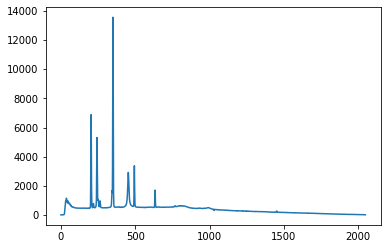

In [59]:
from specio import specread
from specio.datasets import load_spc_path
import matplotlib.pyplot as plt


spectra = specread('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220412 H2 test LN2 DUT2 0.5in8cm\\20220412_H2_154PSI_0.5SLM_77.3K_1_00000.spc')
spectra.amplitudes = spectra.amplitudes.tolist()

df = pd.read_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220412 H2 test LN2 DUT2 0.5in8cm\\20220412_H2_154PSI_0.5SLM_77.3K_1_00000.csv', header=None)
amp = df[1].tolist()

print(spectra.amplitudes[:20])
print(amp[:20])

# plt.plot(spectra.amplitudes)
plt.plot(amp)


In [9]:
# Extraction of units
value = '100.89PSIG'

def splitUnits(value):
    for idx, i in enumerate(value):
        if i.isalpha():
            break
    print(value[:idx], value[idx:])
    
splitUnits(value)

6
100.89 PSIG


In [21]:
# Check if all CSV in folder have the same values in 1st column
import pandas as pd
import os

folder = 'C:\\Users\\Quantum\\Desktop\\Raman Spectra'
first_iter = True

# Compares a data frame to another data frame which loaded by a path
def isSameXAxis(df, path):
    df2 = pd.read_csv(path, header=None)

    for i in range(len(df)):
        if df[0][i] != df2[0][i]:
            return False
            break
    return True

for root, dirs, files in os.walk(folder):
    # select file name
    for file in files:
        # check the extension of files
        if file.endswith('.csv'):
            # Initial setup if on the first iteration
            if first_iter:
                first_df = pd.read_csv(os.path.join(root, file), header=None)
                first_iter = False
                continue
            # Print the file name if it does not have the same axis values
            if not isSameXAxis(first_df, os.path.join(root, file)):
                print(file)



20220404_He_110_48.6_10_1_00000.csv
20220404_He_293_0_3_1_00000.csv
20220405_He_177.81PSIG_26.2K_2.4SLM_1_00000.csv
20220405_He_177.81PSIG_26.2K_2.4SLM_1_00001.csv
20220405_He_177.81PSIG_26.2K_2.4SLM_1_00002.csv
20220405_He_18.32PSIG_26.4K_12.4SLM_1_00000.csv
20220405_He_18.32PSIG_26.4K_12.4SLM_1_00001.csv
20220405_He_18.32PSIG_26.4K_12.4SLM_1_00002.csv
20220405_He_294.65PSIG_26.2K_2.3SLM_1_00000.csv
20220405_He_294.65PSIG_26.2K_2.3SLM_1_00001.csv
20220405_He_294.65PSIG_26.2K_2.3SLM_1_00002.csv
20220405_He_432.76PSIG_26.3K_3.0SLM_1_00000.csv
20220405_He_432.76PSIG_26.3K_3.0SLM_1_00001.csv
20220405_He_432.76PSIG_26.3K_3.0SLM_1_00002.csv
20220405_He_61.25PSIG_26.3K_2.4SLM_1_00000.csv
20220405_He_61.25PSIG_26.3K_2.4SLM_1_00001.csv
20220405_He_61.25PSIG_26.3K_2.4SLM_1_00002.csv
20220406_H2_0.38PSIG_0.5SLM_294K_1_00000.csv
20220406_H2_0.38PSIG_0.5SLM_294K_1_00001.csv
20220406_H2_0.38PSIG_0.5SLM_294K_1_00002.csv
20220406_H2_117.35PSIG_0.5SLM_293K_4_00000.csv
20220406_H2_117.35PSIG_0.5SLM_293